# 第 3 章 从零搭建神经网络

该章节内容翻译自 [Victor Zhou](https://victorzhou.com/) 的博客 [Machine Learning for Beginners: An Introduction to Neural Networks](https://victorzhou.com/blog/intro-to-neural-networks/)，已获得作者授权。


## 神经元的实现

In [1]:
import numpy as np

def sigmoid(x: np.ndarray) -> np.ndarray:
    # Sigmoid 激活函数: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights: np.ndarray, bias: np.ndarray):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs: np.ndarray) -> np.ndarray:
        # 点积权重和输入, 添加偏差
        total = np.dot(self.weights, inputs) + self.bias
        # 使用激活函数处理
        return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.9990889488055994

0.9990889488055994


## 神经网络的实现

In [2]:
import numpy as np

# 神经元的定义代码部分
class OurNeuralNetwork:
    """
    包含以下层的神经网络:
    - 2 个输入
    - 1 个包含 2 个神经元（h1, h2）的隐藏层
    - 1 个包含 1 个神经元（o1）的输出层
    所有的神经元有同样的权重和偏差：
    - w = [0, 1]
    - b = 0
    """

    def __init__(self):
        weights = np.array([0, 1])
        bias = 0

        # 神经元（Neuron）类来自之前的定义
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x: np.ndarray):
        # 使用隐藏层1（h1）前向传播 x，得到结果 out_h1
        out_h1 = self.h1.feedforward(x)
        # 使用隐藏层2（h2）前向传播 x，得到结果 out_h2
        out_h2 = self.h2.feedforward(x)

        # o1 输出层的输入来自 h1 和 h2 的输出
        # out_o1 为 o1 层前向传播后结果
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

        return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))  # 0.7216325609518421

0.7216325609518421


### 均方误差的实现

In [3]:
import numpy as np

def mse_loss(y_true: np.ndarray, y_pred: np.ndarray) -> np.float:
    # y_true 是 y_pred 同样形状的 Numpy 数组
    return ((y_true - y_pred) ** 2).mean()

y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred)) # 0.5

0.5


### 完整的代码实现

In [4]:
%matplotlib inline

import numpy as np


def sigmoid(x: np.ndarray) -> np.ndarray:
    # Sigmoid 激活函数: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))


def deriv_sigmoid(x: np.ndarray) -> np.ndarray:
    # Sigmoid 求导: f'(x) = f(x) * (1 - f(x))
    fx = sigmoid(x)
    return fx * (1 - fx)


def mse_loss(y_true: np.ndarray, y_pred: np.ndarray) -> np.float:
    return ((y_true - y_pred) ** 2).mean()


class OurNeuralNetwork:
    """
    包含以下层的神经网络:
      - 2 个输入
      - 1 个包含 2 个神经元（h1, h2）的隐藏层
      - 1 个包含 1 个神经元（o1）的输出层

    *** 注意 ***:
    下面代码并不是真正的神经网络代码，主要是为了演示整个过程。
    但是可以通过这个代码去理解此特定神经网络的工作原理。
    """

    def __init__(self):
        # 权重
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        # 偏移量
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

        # 这里记录 loss，我们一会用这个绘制 loss 变化曲线
        self.loss_history = []

    def feedforward(self, x: np.ndarray) -> np.ndarray:
        """
        进行前向传播
        Args:
            x: 前向传播的张量，包含两个元素的 numpy 数组
        Returns:
            前向传播的结果
        """
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1

    def train(self, data: np.ndarray, all_y_trues: np.ndarray):
        """
        训练过程
        Args:
            data: （n x 2）的 numpy 数组，n 是数据的数量。
            all_y_trues: 包含 n 个元素的 numpy 数组。
        """
        learn_rate = 0.1
        epochs = 1000  # 循环遍历整个数据集的次数

        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # --- 前向传播
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                # --- 计算偏导。
                # --- 命名规范: d_L_d_w1 代表 "偏导 L / 偏导 w1"
                d_L_d_ypred = -2 * (y_true - y_pred)

                # Neuron o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)

                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

                # Neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                # Neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)

                # --- 更新权重和偏移量
                # Neuron h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

                # Neuron h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

                # Neuron o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

            # --- 每 10 轮循环计算一次整体的损失
            if epoch % 10 == 0:
                # np.apply_along_axis 函数的主要功能就是对数组里的每一个元素进行变换
                # 下面函数可以简单理解为 y_preds = [self.feedforward(i) for i in data]
                # 这里就是对元素所有的元素进行前向传播，然后计算 loss
                y_preds = np.apply_along_axis(self.feedforward, 1, data)

                loss = mse_loss(all_y_trues, y_preds)
                self.loss_history.append(loss)
                print("Epoch %d loss: %.3f" % (epoch, loss))


# 定义数据集
data = np.array([
    [-2, -1],  # Alice
    [25, 6],   # Bob
    [17, 4],   # Charlie
    [-15, -6], # Diana
])
all_y_trues = np.array([
    1,  # Alice
    0,  # Bob
    0,  # Charlie
    1,  # Diana
])

# 训练神经网络
network = OurNeuralNetwork()
network.train(data, all_y_trues)

Epoch 0 loss: 0.233
Epoch 10 loss: 0.084
Epoch 20 loss: 0.048
Epoch 30 loss: 0.037
Epoch 40 loss: 0.031
Epoch 50 loss: 0.028
Epoch 60 loss: 0.025
Epoch 70 loss: 0.023
Epoch 80 loss: 0.021
Epoch 90 loss: 0.019
Epoch 100 loss: 0.018
Epoch 110 loss: 0.017
Epoch 120 loss: 0.016
Epoch 130 loss: 0.015
Epoch 140 loss: 0.014
Epoch 150 loss: 0.013
Epoch 160 loss: 0.013
Epoch 170 loss: 0.012
Epoch 180 loss: 0.011
Epoch 190 loss: 0.011
Epoch 200 loss: 0.010
Epoch 210 loss: 0.010
Epoch 220 loss: 0.010
Epoch 230 loss: 0.009
Epoch 240 loss: 0.009
Epoch 250 loss: 0.009
Epoch 260 loss: 0.008
Epoch 270 loss: 0.008
Epoch 280 loss: 0.008
Epoch 290 loss: 0.007
Epoch 300 loss: 0.007
Epoch 310 loss: 0.007
Epoch 320 loss: 0.007
Epoch 330 loss: 0.007
Epoch 340 loss: 0.006
Epoch 350 loss: 0.006
Epoch 360 loss: 0.006
Epoch 370 loss: 0.006
Epoch 380 loss: 0.006
Epoch 390 loss: 0.006
Epoch 400 loss: 0.005
Epoch 410 loss: 0.005
Epoch 420 loss: 0.005
Epoch 430 loss: 0.005
Epoch 440 loss: 0.005
Epoch 450 loss: 0.005

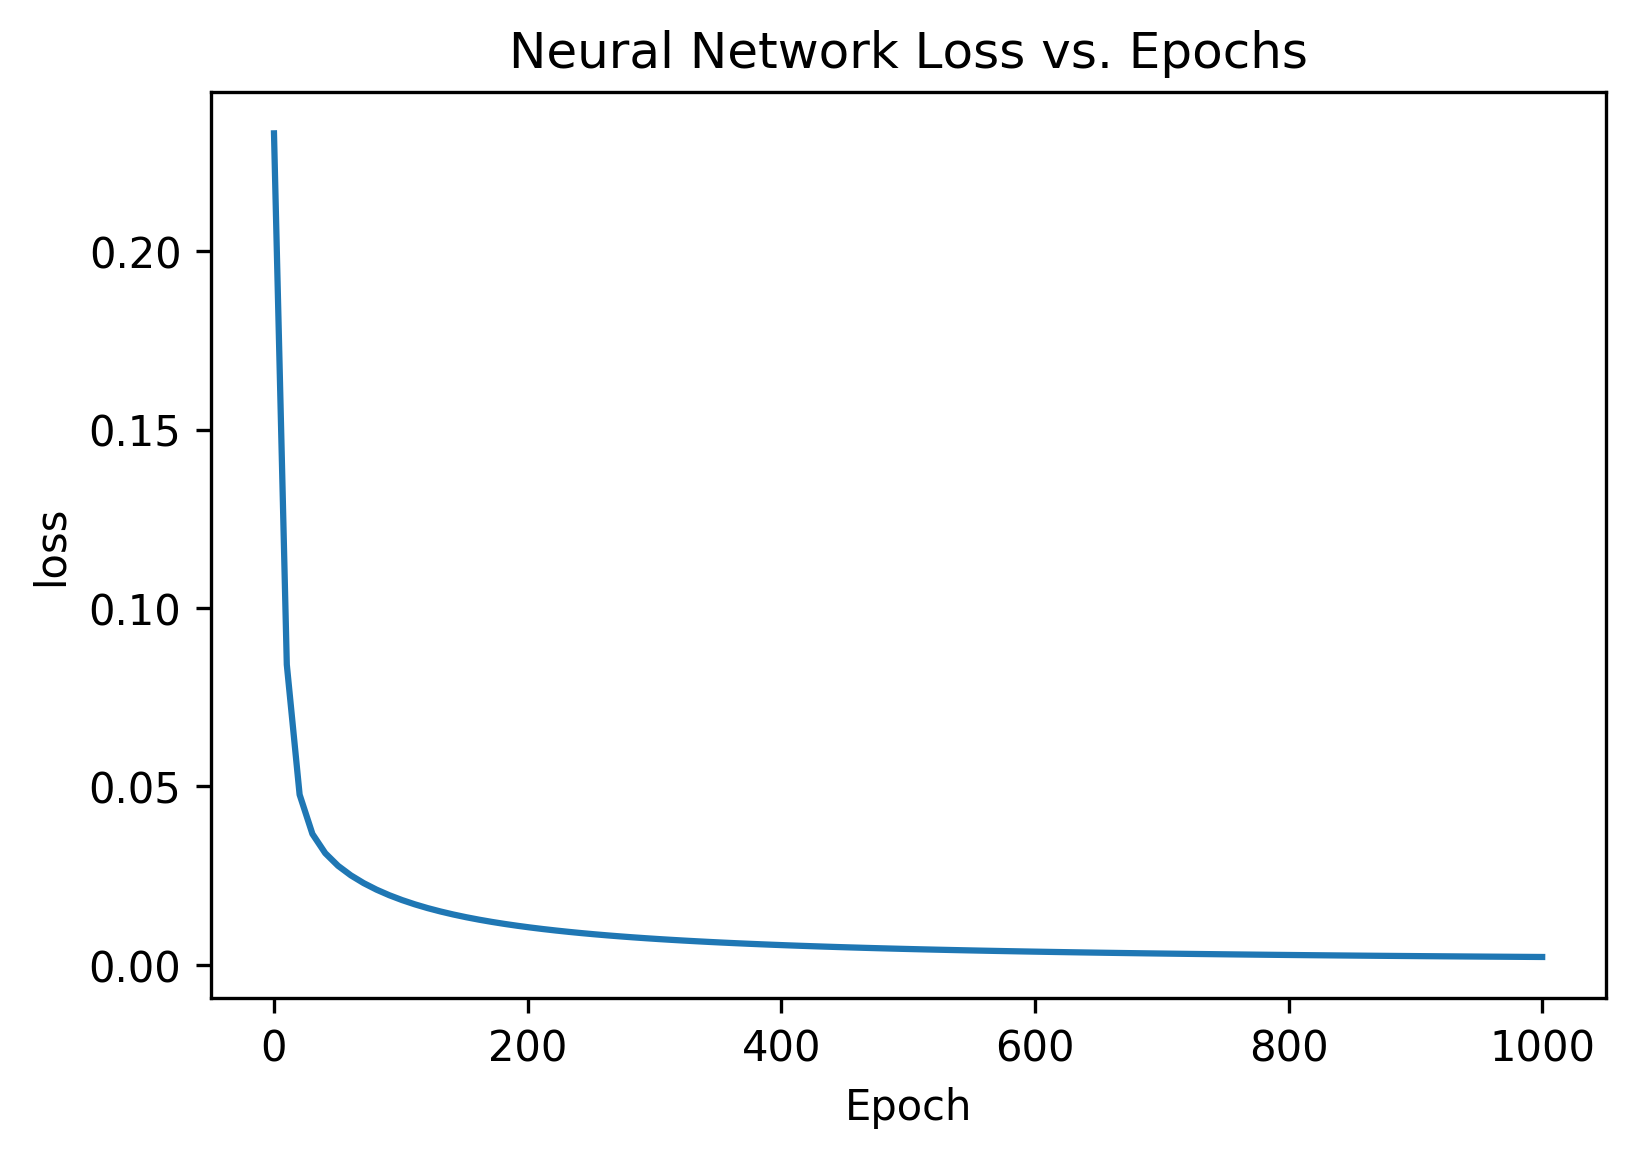

In [5]:
# 绘制 loss 曲线
import matplotlib.pyplot as plt
# 如果绘制图表不清晰，可以设置高 dpi 来提高图表清晰度
plt.rcParams['figure.dpi'] = 300

# 绘制 loss 图像
plt.figure()
plt.plot(np.linspace(0, 1000, 100), network.loss_history)
plt.title('Neural Network Loss vs. Epochs')  # 给 x 轴添加标签
plt.xlabel('Epoch')  # 给 x 轴添加标签
plt.ylabel('loss')  # 给 y 轴添加标签
plt.show()

In [6]:
# 试试预测结果
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches

print("Emily: %.3f" % network.feedforward(emily)) # 0.969 - 女性
print("Frank: %.3f" % network.feedforward(frank)) # 0.969 - 男性

Emily: 0.969
Frank: 0.054


In [2]:
np.ndarray

numpy.ndarray